# 03wk-2: 깊은신경망 – 로지스틱의 한계 극복

최규빈  
2024-03-20

<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/03wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-y4BW27vnVa08AtMixu1IwL&si=v_BjoNGj2eVBht3Z>

# 2. Imports

In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 3. 꺽인그래프를 만드는 방법

`-` 로지스틱의 한계를 극복하기 위해서는 시그모이드를 취하기 전에 꺽인
그래프 모양을 만드는 기술이 있어야겠음.

`-` 아래와 같은 벡터 ${\boldsymbol x}$를 가정하자.

In [ ]:
x = torch.linspace(-1,1,1001).reshape(-1,1)
x

tensor([[-1.0000],
        [-0.9980],
        [-0.9960],
        ...,
        [ 0.9960],
        [ 0.9980],
        [ 1.0000]])

`-` 목표: 아래와 같은 벡터 ${\boldsymbol y}$를 만들어보자.

$${\boldsymbol y} = [y_1,y_2,\dots,y_{n}], \quad y_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$$

## A. 방법1

In [ ]:
y = x*0
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]

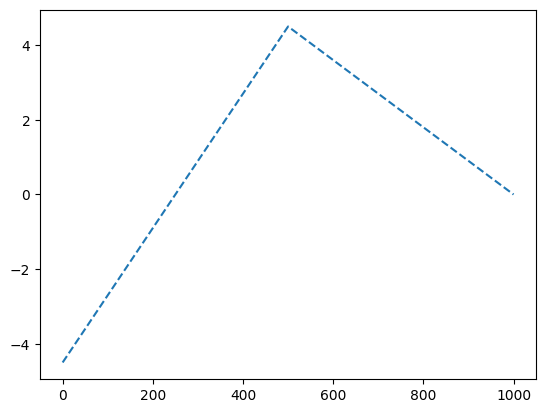

In [ ]:
plt.plot(y,'--')

> **Note**
>
> 강의영상에 보셨듯이 아래의 코드실행결과는 다르게 나옵니다.
>
> ``` python
> ## 아래를 실행하면 꺽인선이 나오는데용...
> x = torch.linspace(-1,1,1001).reshape(-1,1)
> y = x*0 + x
> y[x<0] = (9*x+4.5)[x<0]
> y[x>0] = (-4.5*x+4.5)[x>0]
> plt.plot(x,y)
> ```
>
> ``` python
> ## 이걸 실행하면 그냥 직선이 나옵니다...
> x = torch.linspace(-1,1,1001).reshape(-1,1)
> y = x
> y[x<0] = (9*x+4.5)[x<0]
> y[x>0] = (-4.5*x+4.5)[x>0]
> plt.plot(x,y)
> ```
>
> 다르게 나오는 이유가 너무 궁금하시다면 아래의 링크로 가셔서
> 깊은복사/얕은복사에 대한 개념을 이해하시면 됩니다. (그렇지만
> 가능하다면 궁금해하지 마세요…..)
>
> -   [깊은복사 얕은복사 강의들으러
>     가기](https://guebin.github.io/PP2023/posts/2023-06-21-13wk-1.html)

## B. 방법2 – 렐루이용

In [ ]:
relu = torch.nn.ReLU() #0에서 알아서 꺾어서 만들어줌..

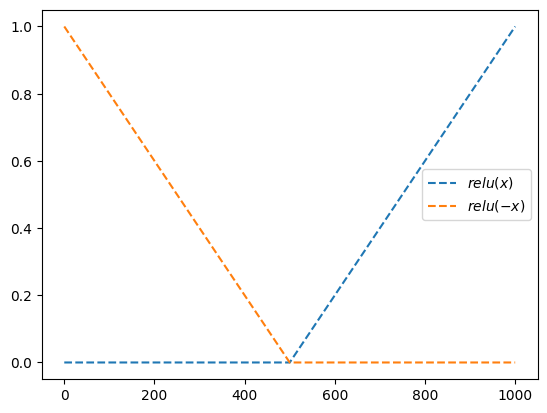

In [ ]:
plt.plot(relu(x),'--',label=r'$relu(x)$') #음수면 0 양수는 그대로 반환해주는 기능인가보군.. 맞다.
plt.plot(relu(-x),'--',label=r'$relu(-x)$')
plt.legend()

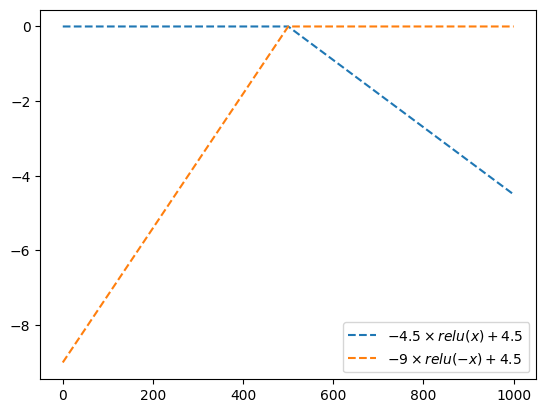

In [ ]:
plt.plot(-4.5*relu(x) ,'--',label=r'$-4.5\times relu(x) + 4.5$')
plt.plot(-9*relu(-x) ,'--',label=r'$-9\times relu(-x) + 4.5$')
plt.legend()

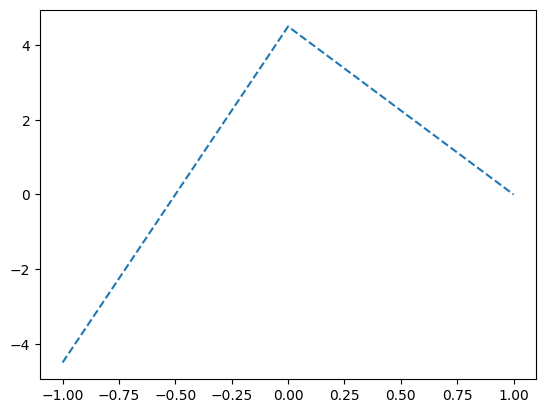

In [ ]:
plt.plot(x,y,'--') #실제 라벨값

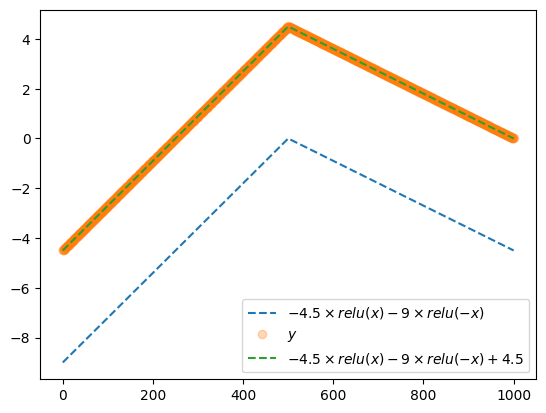

In [ ]:
plt.plot(-4.5*relu(x)-9*relu(-x),'--',label=r'$-4.5\times relu(x) -9 \times relu(-x)$')
plt.plot(y,'o',label=r'$y$', alpha = 0.3)
plt.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',label=r'$-4.5\times relu(x) -9 \times relu(-x)+4.5$')
#얘가 녹색인데 겹쳐서 잘 안보이는 중.
#절편 맞추기..!!
plt.legend()

`-` 우리의 목표: 저 초록선에서 시그모이드를 태우면된다. 즉 아래의 느낌임

`RELU:` Rectified Linear Unit... 음이면 0 양이면 해당 함수를 반환해주는 활성함수

In [ ]:
sig = torch.nn.Sigmoid() #표현력을 증가시키기 위해 활성화 함수를 사용한다. ㅋ

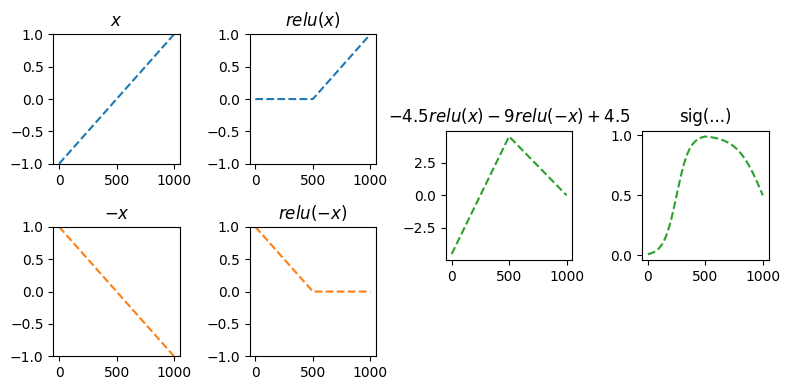

In [ ]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1)
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('sig(...)');
#4,4 격자를 만들고 거기에서 SPEC 만큼 면적을 할당하여 AXIS를 만드는 것이군..

#---#

ax1.plot(x,'--',color='C0')
ax2.plot(-x,'--',color='C1')
ax3.plot(relu(x),'--',color='C0')
ax4.plot(relu(-x),'--',color='C1')
ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

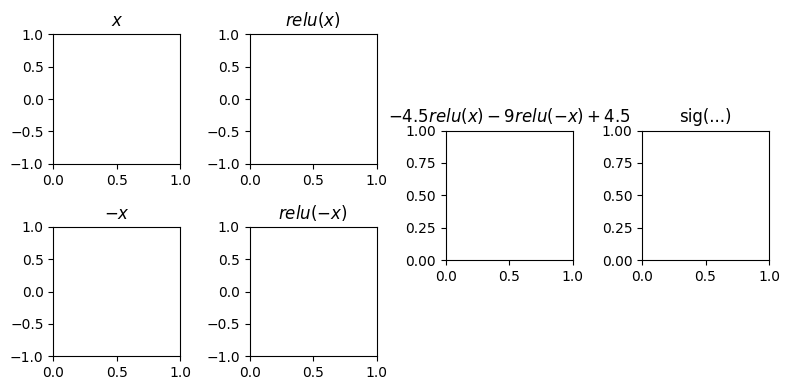

In [ ]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1) #spec[y,x] 이렇게 면적이 할당되는 것 같음..
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('sig(...)');
#4,4 격자를 만들고 거기에서 SPEC 만큼 면적을 할당하여 AXIS를 만드는 것이군..

fig.tight_layout()

## C. 방법2의 다른구현

`-` 렐루이용하여 만드는 방법 정리

1.  벡터 x와 relu함수를 준비한다.
2.  u = \[x,-x\] 를 계산한다.
3.  v = \[relu(x), relu(-x)\] 를 계산한다.
4.  y = -4.5 \* relu(x) - 9 \* relu(-x) +4.5 를 계산한다.

`-` 1단계

In [ ]:
x,relu

(tensor([[-1.0000],
         [-0.9980],
         [-0.9960],
         ...,
         [ 0.9960],
         [ 0.9980],
         [ 1.0000]]),
 ReLU())

`-` 2단계

In [ ]:
u = torch.concat([x,-x],axis=1) # u = [x, -x] 같은것
u

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]])

`-` 3단계

In [ ]:
v = relu(u) # 각각의 column에 렐루취함, 컬럼별로 브로드캐스팅 해준다..
v

tensor([[0.0000, 1.0000],
        [0.0000, 0.9980],
        [0.0000, 0.9960],
        ...,
        [0.9960, 0.0000],
        [0.9980, 0.0000],
        [1.0000, 0.0000]])

`-` 4단계

In [ ]:
-4.5 * v[:,[0]] - 9.0 * v[:,[1]] +4.5 #인덱싱 하는거 기억하기..
#첫컬럼에 -4.5 배, 두번쨰 컬럼에 -9배 하고 절편 4.5만큼 높임.
#인덱싱은 겹을 유지해주지 않으면 그냥 array가 나와버림..

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])

In [ ]:
y #아까 따로 만들었던 값임.. 아래와 비교...

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])

In [ ]:
v.shape

torch.Size([1001, 2])

`-` 그런데, 4단계는 아래와 같이 볼 수 있다.

-   ${\boldsymbol v}\begin{bmatrix} -4.5 \\ -9.0 \end{bmatrix} + 4.5 = \begin{bmatrix} v_{11} & v_{12} \\ v_{21} & v_{22} \\ \dots & \dots \\ v_{n1} & v_{n2} \\ \end{bmatrix}\begin{bmatrix} -4.5 \\ -9.0 \end{bmatrix} + 4.5 = \begin{bmatrix} -4.5 v_{11} - 9.0 v_{12} + 4.5 \\ -4.5 v_{21} - 9.0 v_{22} + 4.5 \\ \dots \\ -4.5 v_{n1} - 9.0 v_{n2} + 4.5 \\ \end{bmatrix}$

위의 수식을 참고하여 매트릭스의 곱 형태로 다시 포현하면 아래와 같다.

In [ ]:
#-4.5 * v[:,[0]] - 9.0 * v[:,[1]] +4.5
What = torch.tensor([[-4.5],[-9.0]]) #2행 1렬
v @ What + 4.5 #행렬 연산을 사용하자 자료가 쉽게 정리 되었다....
#What만 조정하면 꺾인 지점을 조정할 수 있다.

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]])

이제 매트릭스의 곱 대신에 `torch.nn.Linear()`를 이용하면 아래의 코드와
같아진다.

In [ ]:
l2 = torch.nn.Linear(
    in_features=2,
    out_features=1 #절편의 차원은 여기를 기준으로 맞추는 것임.. 한 겹짜리 하나 + 절편.
) #v : n by 2 , u = n by 1

In [ ]:
l2.weight.data = torch.tensor([[-4.5,-9.0]]) #기본 값 대신에 우리가 원하는 값
l2.bias.data = torch.tensor([4.5]) #절편같은 느낌..! 4.5로 우연히 같을 뿐..

In [ ]:
torch.concat([l2(v),y],axis =1 ) #같음, 비교용 코드

tensor([[-4.5000, -4.5000],
        [-4.4820, -4.4820],
        [-4.4640, -4.4640],
        ...,
        [ 0.0180,  0.0180],
        [ 0.0090,  0.0090],
        [ 0.0000,  0.0000]], grad_fn=<CatBackward0>)

`-` 사실 2단계도 아래와 같이 볼 수 있다.

$$\begin{bmatrix}
x_1 \\
x_2 \\
\dots \\
x_n
\end{bmatrix}\begin{bmatrix} 1 & -1 \end{bmatrix} = \begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n \end{bmatrix}$$

위의 모형을 보고 bias가 있는지 없는지 판단을 하는 것이다. 근데 bias는 false로 해두기보다도 True로 해놓고 0으로 조정하는 것이 낫나보다..

In [ ]:
#u = torch.concat([x,-x],axis=1) # u1 = [x, -x] 같은것

In [ ]:
l1 = torch.nn.Linear(1,2)  #입출력 차원 구분,. 출력이 두열.. 그럼 절편이 한겹짜리 두칸값.
l1.weight.data = torch.tensor([[1.0],[-1.0]]) #가중치 조정. 가중치는 열 벡터로 입력
l1.bias.data = torch.tensor([0.0,0.0]) #zero bias. 한겹짜리 두칸값, 즉 bias는 1차원 텐서로 대입한다.

In [ ]:
l1(x) # = u

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]], grad_fn=<AddmmBackward0>)

`-` 따라서 `torch.nn` 에 포함된 레이어를 이용하면 아래와 같이 표현할 할
수 있다.

In [ ]:
l1 = torch.nn.Linear(1,2)
l1.weight.data = torch.tensor([[1.0],[-1.0]]) #원래 행백터인데,, 열벡터로 입력하고..? 뭔가 별론데
l1.bias.data = torch.tensor([0.0,0.0])

a1 = torch.nn.ReLU() #첫 activation function
l2 = torch.nn.Linear(2,1)
l2.weight.data = torch.tensor([[-4.5,-9.0]]) #열벡터이긴 한데,, 행벡터로 입력되는군..
l2.bias.data = torch.tensor([4.5]) #얘도 기본적으로 list로 감싸주는군..

In [ ]:
l2(a1(l1(x))), y

(tensor([[-4.5000],
         [-4.4820],
         [-4.4640],
         ...,
         [ 0.0180],
         [ 0.0090],
         [ 0.0000]], grad_fn=<AddmmBackward0>),
 tensor([[-4.5000],
         [-4.4820],
         [-4.4640],
         ...,
         [ 0.0180],
         [ 0.0090],
         [ 0.0000]]))

`-` 각각의 layer를 `torch.nn.Sequential()` 로 묶으면 아래와 같이 정리할
수 있다.

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,2), #(입력,출력)
    torch.nn.ReLU(),
    torch.nn.Linear(2,1)  #(입력,출력)
) #net라는 합성함수를 잘 활용하도록!!!
l1,a1,l2 = net #언패킹 가능!

#net 는 서브스크립터블 하고.. 콜러블 하다!!

l1.weight.data = torch.tensor([[1.0],[-1.0]]) #피쳐가 하나에서 두개로..
l1.bias.data = torch.tensor([0.0,0.0]) #이것도 다 차원을 고려해서 정하는 것인가보다.. 2열 데이터이니 두 열
#bias가 0임을 제시..
l2.weight.data = torch.tensor([[-4.5,-9.0]]) #피쳐가 두개에서 하나로
l2.bias.data = torch.tensor([4.5])

In [ ]:
net(x),y

(tensor([[-4.5000],
         [-4.4820],
         [-4.4640],
         ...,
         [ 0.0180],
         [ 0.0090],
         [ 0.0000]], grad_fn=<AddmmBackward0>),
 tensor([[-4.5000],
         [-4.4820],
         [-4.4640],
         ...,
         [ 0.0180],
         [ 0.0090],
         [ 0.0000]]))

## D. 수식표현

`(1)` ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

`(2)`
$l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n\end{bmatrix}$

-   ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
-   ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

`(3)`
$(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\ \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

`(4)`
$(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

-   ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
-   $b^{(2)}=4.5$

`(5)`
$net({\bf X})=(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad =\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

# 4. 로지스틱의 한계 극복

## A. 데이터

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2024/main/posts/dnnex.csv")
df

,x,prob,y
0,-1.000000,0.000045,0.0
1,-0.998999,0.000046,0.0
2,-0.997999,0.000047,0.0
3,-0.996998,0.000047,0.0
4,-0.995998,0.000048,0.0
...,...,...,...
1995,0.995998,0.505002,0.0
1996,0.996998,0.503752,0.0
1997,0.997999,0.502501,0.0
1998,0.998999,0.501251,1.0


In [ ]:
x = torch.tensor(df.x).float().reshape(-1,1) #열벡터화
y = torch.tensor(df.y).float().reshape(-1,1) #열벡터화
prob = torch.tensor(df.prob).float().reshape(-1,1) #열벡터화..

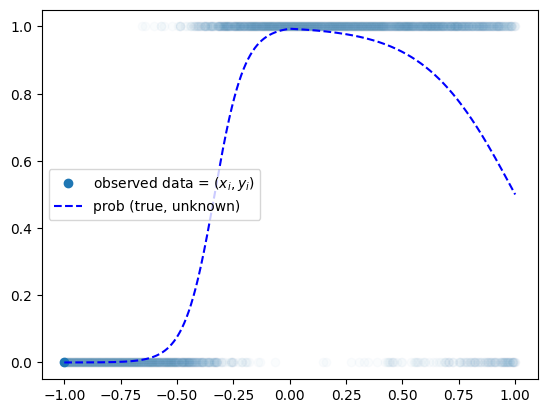

In [ ]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.legend()

## B. Step 1~4

`-` Step1에 대한 생각: 네트워크를 어떻게 만들까? = 아키텍처를 어떻게
만들까? = 모델링

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

`-` Step2,3,4 는 너무 뻔해서..

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential( #차원을 잘 설정하는 연습을 해야겠군..
    torch.nn.Linear(1,2), #얘네가 시행할 때마다 가중치가 바뀜
    torch.nn.ReLU(),
    torch.nn.Linear(2,1), #얘네도..
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss() #loss도 BCE
optimizr = torch.optim.Adam(net.parameters()) #method도 Adam..
#---#
for epoc in range(3000): #단계별 학습.. 너무 당연한 소리를 너무하네 싶을정도로 암기할 것..
    ##
    yhat = net(x)
    ##
    loss = loss_fn(yhat,y) #BCE 로스는 순서가 바뀌면 값이 달라짐... 주의 하도록!!
    ##
    loss.backward()
    ##
    optimizr.step()
    optimizr.zero_grad()

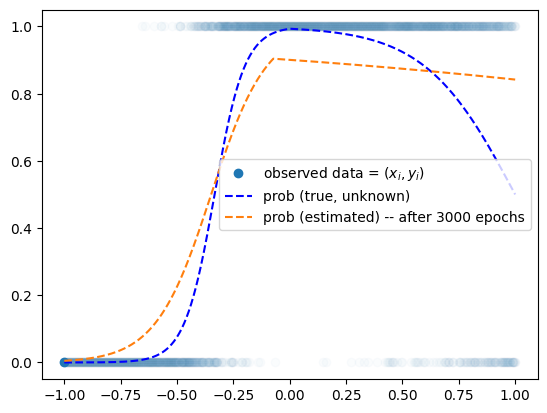

In [ ]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.plot(x,net(x).data,'--',label="prob (estimated) -- after 3000 epochs")
plt.legend()

In [ ]:
for epoc in range(3000): #이미 했던거에 결과를 계승해서 3000번 더함!!!
    ##
    yhat = net(x)
    ##
    loss = loss_fn(yhat,y)
    ##
    loss.backward()
    ##
    optimizr.step()
    optimizr.zero_grad()

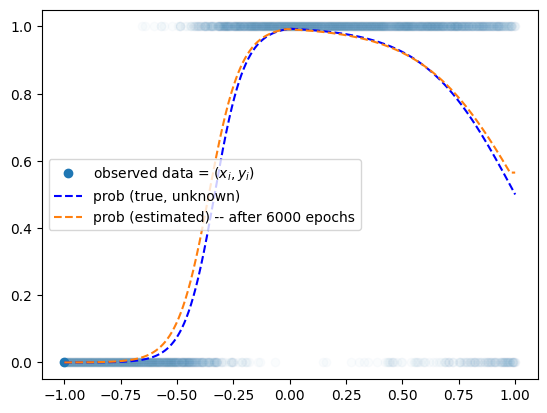

In [ ]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x[0],y[0],'o',label= r"observed data = $(x_i,y_i)$",color="C0")
plt.plot(x,prob,'--b',label= r"prob (true, unknown)")
plt.plot(x,net(x).data,'--',label="prob (estimated) -- after 6000 epochs")
plt.legend()

In [ ]:
#적합된 결과의 가중치들을 살펴보자
l_1,r_1,l_2,_ = net

In [ ]:
l_1.weight, l_1.bias #적합된 가중치와 bias,,

(Parameter containing:
 tensor([[-1.6157],
         [-4.3290]], requires_grad=True),
 Parameter containing:
 tensor([ 1.5788, -0.0618], requires_grad=True))

In [ ]:
l_2.weight, l_2.bias

(Parameter containing:
 tensor([[ 2.8593, -4.3151]], requires_grad=True),
 Parameter containing:
 tensor([0.2620], requires_grad=True))